In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import sys
sys.path.append("../../")
import helpers

from pathlib import Path
from importlib import reload
reload(helpers)

sys.path.append("../../../gempy")
import gempy as gp
from gempy.assets import topology as tp

import os

from gempy.plot import vista as vs
import pyvista as pv

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
reload(helpers)
geo_model, edges_init, centroids_init = helpers.prepare_geomodel()

C:\Users\r02as18\miniconda3\envs\topology\lib\site-packages\theano\gpuarray\dnn.py:184: UserWarning: Your cuDNN version is more recent than Theano. If you encounter problems, try updating Theano or downgrading cuDNN to a version >= v5 and <= v7.
  warnings.warn("Your cuDNN version is more recent than "
../../../gempy\gempy\core\data.py:1742: UserWarning: If pole_vector and orientation are passed pole_vector is used/
  warnings.warn('If pole_vector and orientation are passed pole_vector is used/')


In [3]:
def clip(horizon, faults, value):
    horizons = []

    horizons.append(
        horizon.clip_surface(fault4, value=-value)
    )

    for f1, f2 in zip(faults[:-1], faults[1:]):
         horizons.append(
            horizon.clip_surface(
                f1, invert=False, value=value
            ).clip_surface(
                f2, value=-value
            )
        )

    horizons.append(
        horizon.clip_surface(fault3, invert=False, value=value)
    )
    return horizons
    

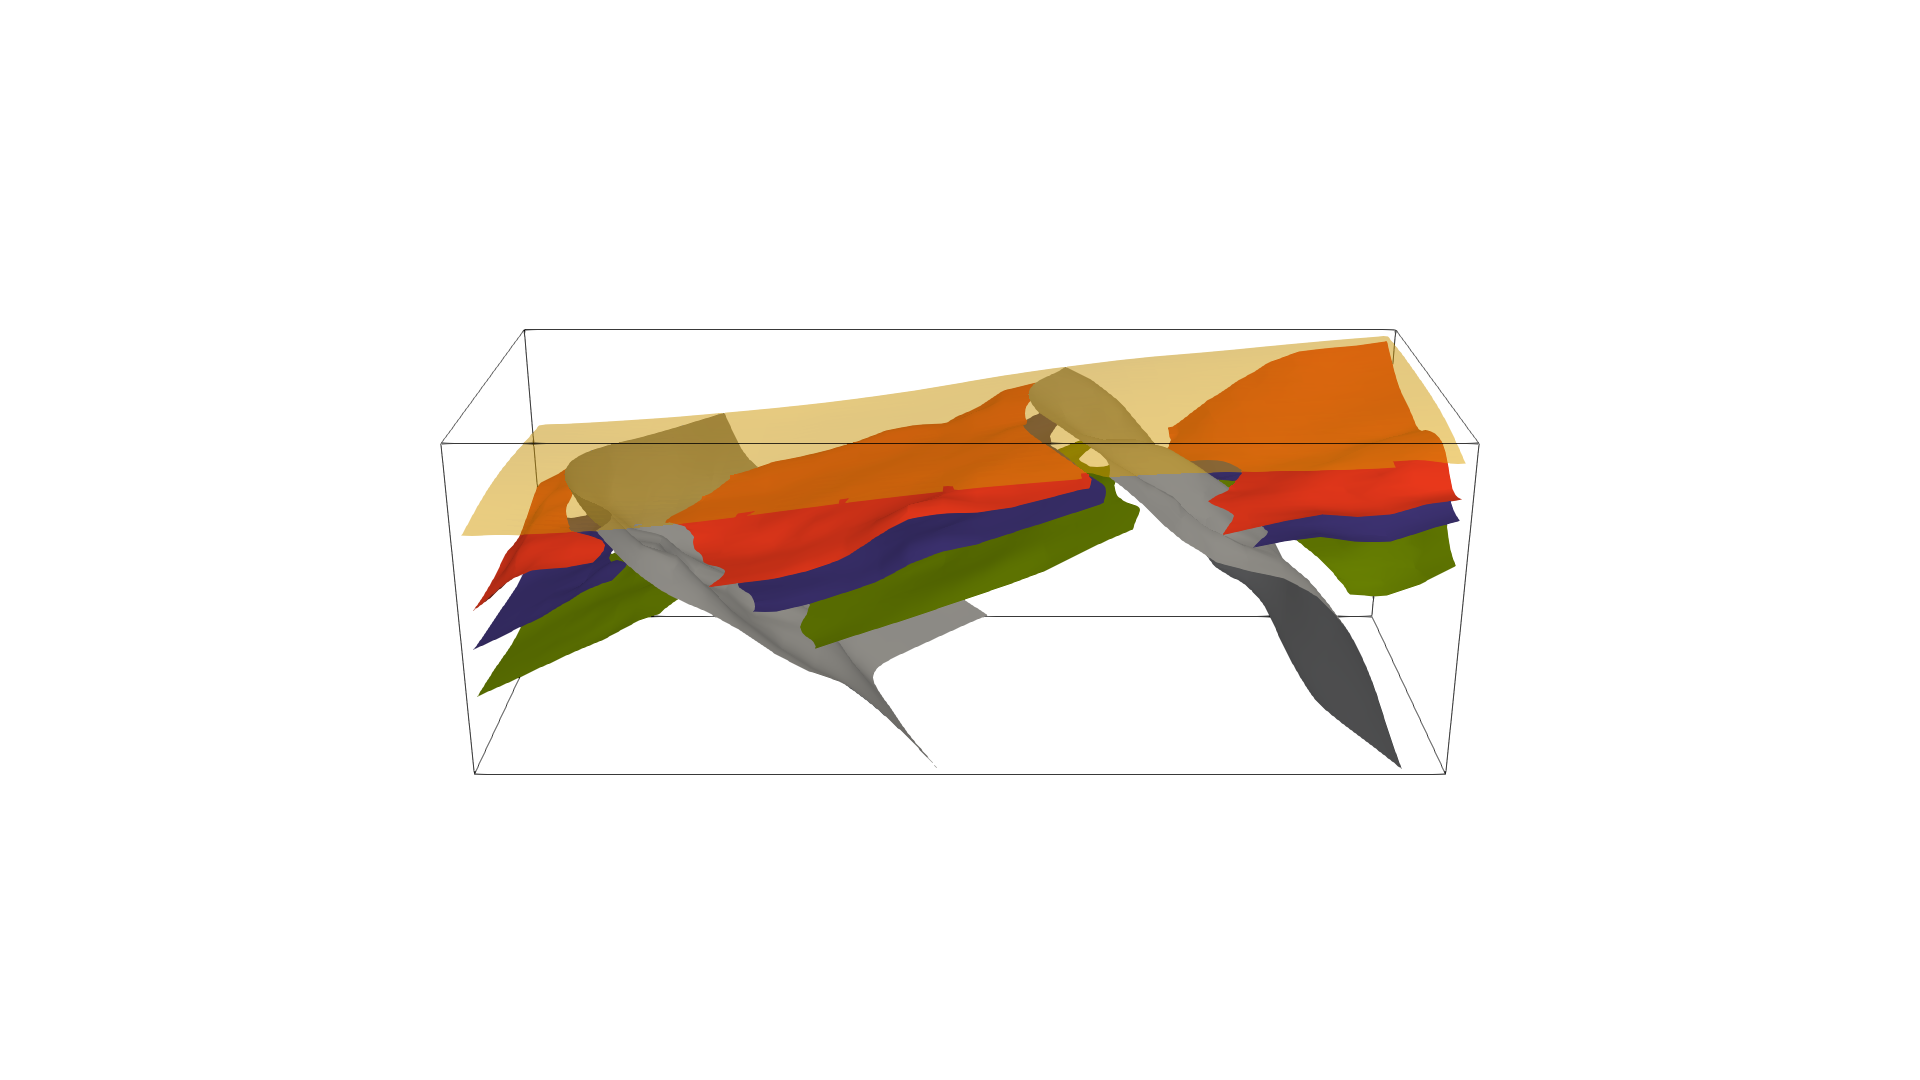

In [97]:
reload(vs)
pv.set_plot_theme("document")
gpv = vs.Vista(geo_model, notebook=True)

ambient = 0.1
diffuse = 0.9

gpv.p.enable_depth_peeling(10)

bcu = gpv.get_surface("BCU")
gpv.p.add_mesh(bcu, color="#ffbe00", opacity=0.5)

fault3 = gpv.get_surface("fault3")
fault3 = fault3.clip_surface(bcu)

fault4 = gpv.get_surface("fault4")
fault4 = fault4.clip_surface(bcu)

faults = [fault4, fault3]
for fault in faults:
    gpv.p.add_mesh(
        fault, color="grey", opacity=1, ambient=0.3, diffuse=diffuse, specular=0, smooth_shading=True, show_edges=False)

horizon = gpv.get_surface("tarbert")
horizons = clip(horizon, faults, 120)
for h in horizons:
    gpv.p.add_mesh(h, color="#728f02", ambient=ambient, diffuse=diffuse, smooth_shading=True)
    
horizon = gpv.get_surface("etive")
horizons = clip(horizon, faults, 120)
for h in horizons:
    gpv.p.add_mesh(h, color="#ff3f20", ambient=ambient, diffuse=diffuse, show_edges=False, smooth_shading=True)
    
horizon = gpv.get_surface("ness")
horizons = clip(horizon, faults, 120)
for h in horizons:
    gpv.p.add_mesh(h, color="#443988", ambient=ambient, diffuse=diffuse, smooth_shading=True)

# gpv.p.enable_eye_dome_lighting()
gpv.p.enable_anti_aliasing()
gpv.set_bounds()
gpv.p.show_bounds(
    show_xlabels=False, show_ylabels=False, show_zlabels=False,
    xlabel="", ylabel="", zlabel="",
    location="all", padding=0.01
)

# gpv.p.isometric_view()
gpv.p.camera_position = [0, -1, 0.4]



gpv.p.show(screenshot='3dmodel.png', window_size=(1920, 1080))